<a href="https://colab.research.google.com/github/Tattou20/Machine_Learning/blob/main/Logistic_Regression_Ass6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ursulla Navalona Arivola N01586516 - Assignment 6

---



In [34]:
from sklearn.datasets import load_breast_cancer
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,f1_score,precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
import pandas as pd

In [15]:
from google.colab import drive

In [16]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [17]:
dr=pd.read_csv('gdrive/My Drive/Student-Pass-Fail-Data.csv')

In [18]:
dr

,Self_Study_Daily,Tution_Monthly,Pass_Or_Fail
0,7,27,1
1,2,43,0
2,7,26,1
3,8,29,1
4,3,42,0
...,...,...,...
995,6,22,1
996,9,30,1
997,3,39,0
998,7,25,1


## Extracting Features and Targets

In [29]:
X = dr.iloc[:,:-1]
y = dr.iloc[:,-1]

In [30]:
X

,Self_Study_Daily,Tution_Monthly
0,7,27
1,2,43
2,7,26
3,8,29
4,3,42
...,...,...
995,6,22
996,9,30
997,3,39
998,7,25


In [27]:
y

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    0
998    1
999    0
Name: Pass_Or_Fail, Length: 1000, dtype: int64

In [28]:
np.unique(y)

array([0, 1])

## Performing a train test split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Standardizing the data

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Getting CV Score on Training data

In [35]:
k = 5
cv = KFold(n_splits=k, random_state = 42 , shuffle=True)

# Build multiple logistic regression model
model_cv = LogisticRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model_cv, X_train, y_train, scoring='accuracy', cv=cv )
np.mean(scores)
print("Avg accuracy : %0.2f" % (np.mean(scores)))

Avg accuracy : 0.97


An average accuracy of 0.97  means that the model is correctly classifying the data with an accuracy of 97%.

## Getting Predictions from test data

In [37]:
y_pred_cv = cross_val_predict(model_cv, X_test, y_test, cv = cv)

## Calculating Accuracy

In [38]:
Accuracy = np.mean(y_pred_cv == y_test) * 100
print("Avg accuracy : %2.2f" % (Accuracy))

Avg accuracy : 98.00


It indicates that the model correctly predicts the target variable for approximately 98% of the test data, which is a strong performance.

## Generating Confusion Matrics

In [39]:
font = {
    'weight' : 'bold',
    'size'   : 15}
plt.rc('font', **font)

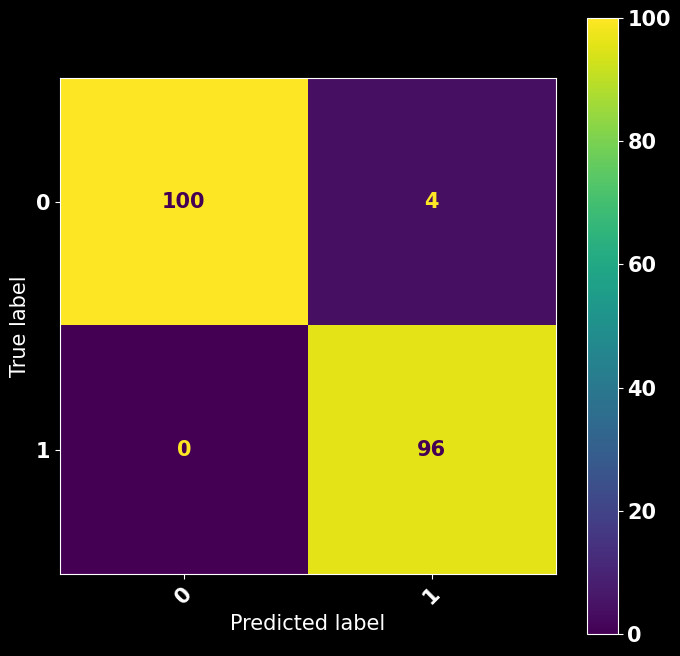

In [40]:
cm = confusion_matrix(y_test, y_pred_cv)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(8)
fig.set_figheight(8)
plt.show()

False value are just 4 lesser than, so the prediction is good.

## Calculating Precision, Recall and F1-Score

In [41]:
Metrics = pd.DataFrame({"Accuracy":[accuracy_score(y_test, y_pred_cv, normalize=True)]
,"Precision":[precision_score(y_test, y_pred_cv, average = 'macro')]
,"Recall":[recall_score(y_test, y_pred_cv, average = 'macro')]
,"F1-Score":[f1_score(y_test, y_pred_cv, average = 'macro')]})


In [42]:
Metrics

,Accuracy,Precision,Recall,F1-Score
0,0.98,0.98,0.980769,0.979992


The results are almost the same, so there is a balanced dataset.